In [1]:
import wbgapi as wb
import pandas as pd
from model import Model, regression
from feature_engineering import engineering
from sklearn.model_selection import train_test_split

In [2]:
class DataPipeline():

    def __init__(self, indicators, year):
        self.indicators = indicators
        self.year = year

        self.happiness_data = pd.read_csv('./data/happiness/happiness.csv').drop('Country', axis=1)
        self.valid_countries = self.happiness_data['ISO_A3'].unique()

        wb.db = 2
        # print(wb.series.info())

    def pull_wb_data(self):
        data = wb.data.DataFrame(self.indicators, time=self.year)
        return data
    
    def get_data(self):
        features = self.pull_wb_data()
        features = features.reset_index()
        features = features.rename(columns={features.columns[0]: 'ISO_A3'})
        features = features[features['ISO_A3'].isin(self.valid_countries)]
        merged = pd.merge(features, self.happiness_data, on='ISO_A3')
        return merged

In [2]:
df = pd.read_csv("./data/happiness/no_missing.csv", index_col=0)
y = df['Happiness score']
X = df.drop(labels=["ISO_A3", "Happiness score"], axis=1)
#X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.15)

In [3]:
regr = regression(est_type='rdf', tuning_strategy='bayesian', cv_fold=10, num_trials=450, og_df=df)

In [4]:
regr.make_full_model(X_train=X, y_train=y)

/Users/oscarescobar/Desktop/ACME/Projects/Vol3/Fall/model.py:908: UserWarning: NOTE: Please check the hidden attributes for the model choice: reg, and estimator: rdf before hypertuning should you want to have different hyperparameters than the ones set as default.
  warnings.warn(message=f"NOTE: Please check the hidden attributes for the model choice: {self.model_choice}, and estimator: {self.est_type} before hypertuning " +\


Now continuing.
Making RandomForestRegressor using Bayesian optimization...
Training and tuning...


  0%|          | 0/450 [00:00<?, ?it/s]

Training completed.
The best oob_score is -0.440763477058234


In [5]:
regr.get_happiness_predictions(X=X)

In [6]:
regr.get_happiness_residuals(y_true=y)

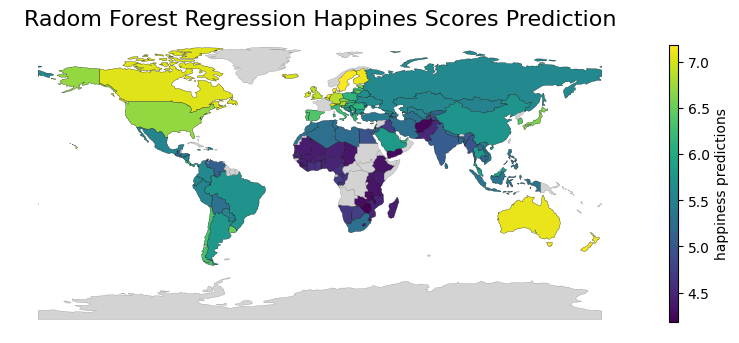

In [8]:
regr.get_worldplot(fig_title='Radom Forest Regression Happines Scores Prediction', save_fig=True, path_to_fig="./images/rdf_reg_happiness_pred.pdf")

In [7]:
eng_obj = engineering(X_tr=X, y_tr=y, select_kfeats=45, mut_info_kneighbors=70)

In [16]:
pca_obj = engineering(X_tr=X, y_tr=y, pca_comp=30)

In [17]:
pca_obj.get_pca_features()

In [15]:
pca_obj.X_tr_pca.shape

(10, 128)

In [3]:
dp = DataPipeline(['NY.GDP.PCAP.CD', 'SP.POP.TOTL'], 2022)
data = dp.get_data()
print(data.head())

print(data.isna().sum())
data = data.dropna()


  ISO_A3  NY.GDP.PCAP.CD  SP.POP.TOTL  Happiness score
0    AFG      352.603733   41128771.0           2.4038
1    ALB     6810.114041    2777689.0           5.1988
2    ARE    53707.980081    9441129.0           6.5760
3    ARG    13650.604629   46234830.0           5.9670
4    ARM     7018.051504    2780469.0           5.3986
ISO_A3             0
NY.GDP.PCAP.CD     2
SP.POP.TOTL        0
Happiness score    0
dtype: int64


In [9]:
info = wb.series.info()
f = open('features.txt', 'w')
f.write(str(info))

131760